# Project 1
The main goal of this project is to do some basic image processing on some png images. 

## Setup

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scikit-image
!{sys.executable} -m pip install matplotlib


You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


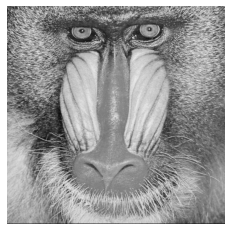

In [2]:
# Test setup, should show the city.png image
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# open image file and stores it in a numpy array
img = io.imread('png_images/baboon.png')

plt.axis('off')
imgplot = plt.imshow(img, cmap='gray')

## Change the resolution of a image
Given a image with a certain resolution X and size Y, halve the resolution while mantaing the image's size.

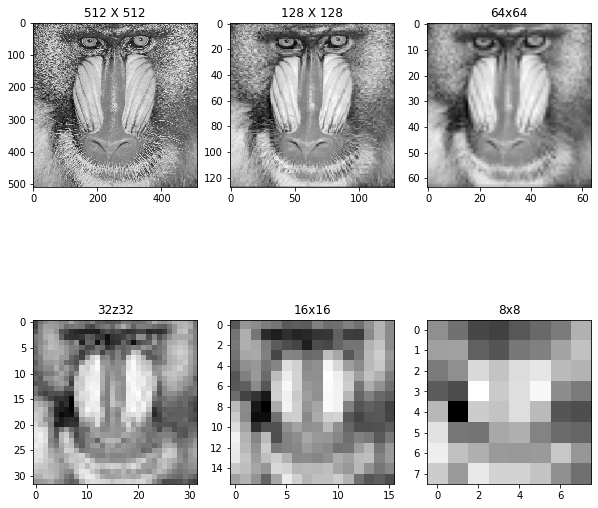

In [3]:
from skimage.transform import rescale, resize, downscale_local_mean


def halve_resolution(image):
    return downscale_local_mean(image, (2,2)).astype('uint8')

image256x256 = halve_resolution(img)
image128x128 = halve_resolution(image256x256)
image64x64 = halve_resolution(image128x128)
image32x32 = halve_resolution(image64x64)
image16x16 = halve_resolution(image32x32)
image8x8 = halve_resolution(image16x16)

# print(image256x256)
# plt.axis('off')
# imgplot = plt.imshow(image8x8,  cmap='gray')
# io.imsave('image256x256.png', image256x256)

# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# ax1.imshow(img, cmap='gray')
# ax1.set_title('Normal image')

# ax2.imshow(image256x256, cmap='gray')
# ax2.set_title('128x128')

fig1 = plt.figure(figsize=[10,10])

ax1 = fig1.add_subplot(2,3,1) 
ax1.imshow(img, interpolation='none', cmap='gray')
ax1.set_title('512 X 512')

ax2 = fig1.add_subplot(2,3,2)
ax2.imshow(image128x128, interpolation='none', cmap='gray')
ax2.set_title('128 X 128')

ax3 = fig1.add_subplot(2,3,3)
ax3.imshow(image64x64, cmap='gray')
ax3.set_title('64x64')

ax4 = fig1.add_subplot(2,3,4)
ax4.imshow(image32x32, cmap='gray')
ax4.set_title('32z32')

ax5 = fig1.add_subplot(2,3,5)
ax5.imshow(image16x16, cmap='gray')
ax5.set_title('16x16')

ax6 = fig1.add_subplot(2,3,6)
ax6.imshow(image8x8, cmap='gray')
ax6.set_title('8x8')

fig1.savefig('resolution.png')


## Image Quantization
Create a function that can reduce the amount of shades of grey of a image to the number desired.

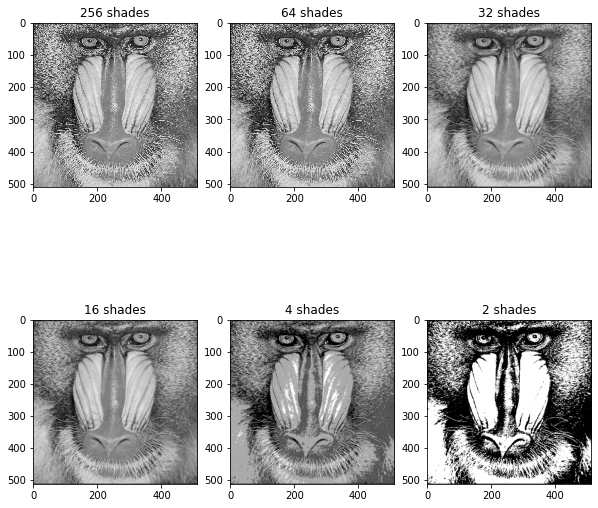

In [4]:
from math import log
def reduce_shades(image, n_shades):
    power_of_two = int(log(n_shades, 2))
    return image>>(8-power_of_two)

image64 = reduce_shades(img, 64)
image32 = reduce_shades(img, 32)
image16 = reduce_shades(img, 16)
image4 = reduce_shades(img, 4)
image2 = reduce_shades(img, 2)

fig2 = plt.figure(figsize=[10,10])

ax1 = fig2.add_subplot(2,3,1) 
ax1.imshow(img, interpolation='none', cmap='gray')
ax1.set_title('256 shades')

ax2 = fig2.add_subplot(2,3,2)
ax2.imshow(image64, interpolation='none', cmap='gray')
ax2.set_title('64 shades')

ax3 = fig2.add_subplot(2,3,3)
ax3.imshow(image32, cmap='gray')
ax3.set_title('32 shades')

ax4 = fig2.add_subplot(2,3,4)
ax4.imshow(image16, cmap='gray')
ax4.set_title('16 shades')

ax5 = fig2.add_subplot(2,3,5)
ax5.imshow(image4, cmap='gray')
ax5.set_title('4 shades')

ax6 = fig2.add_subplot(2,3,6)
ax6.imshow(image2, cmap='gray')
ax6.set_title('2 shades')


fig2.savefig('quant.png')


## Grayscale
Given a image, for every pixel value in the image f[x,y] , transform it into a g(x,y) in these ways:    

[[1550  470  386 ... 1154 1646 1934]
 [1202 1022  278 ... 1358 1586 1310]
 [ 722 1178  362 ... 1010  866  782]
 ...
 [1490 1550 1490 ...  794  878  746]
 [1670 1490 1382 ...  746  758  638]
 [  30   32   38 ...   60   30   40]]
[[154  47  38 ... 115 163 192]
 [119 101  28 ... 135 157 130]
 [ 72 117  36 ... 100  86  78]
 ...
 [148 154 148 ...  79  87  74]
 [166 148 137 ...  74  75  63]
 [  3   3   4 ...   6   3   4]]


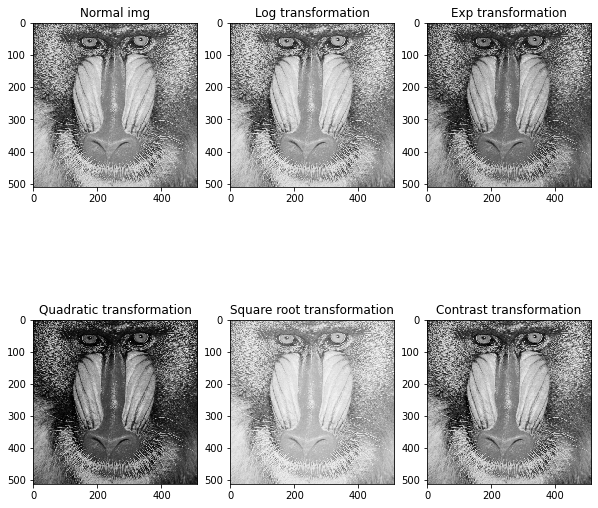

In [75]:
from math import exp
default_c = 255

def float_to_int8(float_matrix):
    rounded_matrix = np.round(float_matrix)
    return rounded_matrix.astype('uint8')


def normalize(image):
    return image/255

def denormalize(image, c):
    min_pixel = image.min()
    max_pixel = image.max()
    return float_to_int8(c*(image-min_pixel)/(max_pixel-min_pixel))

def transform_log(image, c = default_c):
    normalized_image = normalize(image)
    return denormalize(np.log(normalized_image+1), c)

def transform_exp(image, c = default_c):
    normalized_image = normalize(image)
    exp_image = np.exp(normalized_image)
    return denormalize(exp_image, c)

def transform_quadratic(image, c = default_c):
    normalized_image = normalize(image)
    return denormalize(np.power(normalized_image, 2), c)

def transform_sqrt(image, c = default_c):
    normalized_image = normalize(image)
    return denormalize(np.sqrt(normalized_image), c)

def transform_contrast(image, a, b, alpha, beta, gamma):
    def transform_pixel(f):
        if f < a:
            return a*f
        elif a<= f and f < b:
            return beta*(f-a) + alpha*a
        else:
            return gamma*(f-b) + beta*(f-a) + alpha*a
    transform_pixel_vec = np.vectorize(transform_pixel)
    t_image = transform_pixel_vec(image)
    print(t_image)
    print(denormalize(t_image, c=255))
    return transform_pixel_vec(image)
    
    
img_log = transform_log(img)
img_exp = transform_exp(img)
img_quad = transform_quadratic(img)
img_sqrt = transform_sqrt(img)
img_contrast = transform_contrast(img, 10, 20, 3, 2, 10)

fig3 = plt.figure(figsize=[10,10])

ax1 = fig3.add_subplot(2,3,1) 
ax1.imshow(img, interpolation='none', cmap='gray')
ax1.set_title('Normal img')

ax2 = fig3.add_subplot(2,3,2)
ax2.imshow(img_log, interpolation='none', cmap='gray')
ax2.set_title('Log transformation')

ax3 = fig3.add_subplot(2,3,3)
ax3.imshow(img_exp, interpolation='none', cmap='gray')
ax3.set_title('Exp transformation')

ax4 = fig3.add_subplot(2,3,4)
ax4.imshow(img_quad, interpolation='none', cmap='gray')
ax4.set_title('Quadratic transformation')

ax5 = fig3.add_subplot(2,3,5)
ax5.imshow(img_sqrt, interpolation='none', cmap='gray')
ax5.set_title('Square root transformation')

ax6 = fig3.add_subplot(2,3,6)
ax6.imshow(img_contrast, interpolation='none', cmap='gray')
ax6.set_title('Contrast transformation')


fig3.savefig('grayscale.png')


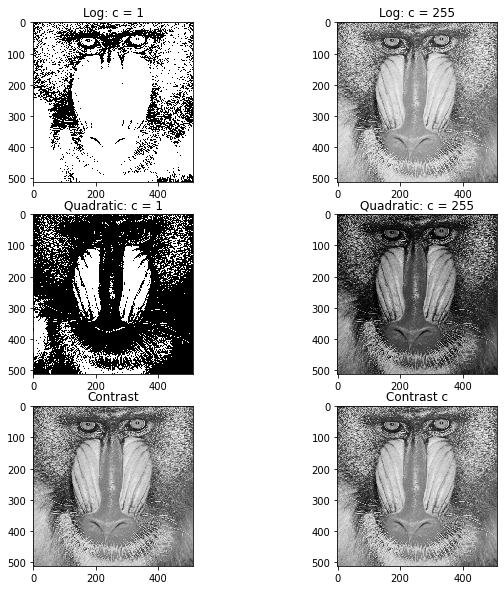

In [63]:
fig4 = plt.figure(figsize=[10,10])

img_log = transform_log(img, c = 1)
img_log_c = transform_log(img, c = 255)
img_quad = transform_quadratic(img, c= 1)
img_quad_c = transform_quadratic(img, c = 255)
img_contrast = transform_contrast(img, 10, 160, 3000, 2, 1)
img_contrast_c = transform_contrast(img, 70, 150, 3, 2, 1)


ax1 = fig4.add_subplot(3,2,1) 
ax1.imshow(img_log, interpolation='none', cmap='gray')
ax1.set_title('Log: c = 1')

ax2 = fig4.add_subplot(3,2,2)
ax2.imshow(img_log_c, interpolation='none', cmap='gray')
ax2.set_title('Log: c = 255')

ax3 = fig4.add_subplot(3,2,3)
ax3.imshow(img_quad, interpolation='none', cmap='gray')
ax3.set_title('Quadratic: c = 1')

ax4 = fig4.add_subplot(3,2,4)
ax4.imshow(img_quad_c, interpolation='none', cmap='gray')
ax4.set_title('Quadratic: c = 255')

ax5 = fig4.add_subplot(3,2,5)
ax5.imshow(img_contrast, interpolation='none', cmap='gray')
ax5.set_title('Contrast')

ax6 = fig4.add_subplot(3,2,6)
ax6.imshow(img_contrast_c, interpolation='none', cmap='gray')
ax6.set_title('Contrast c')


fig4.savefig('c_diff.png')


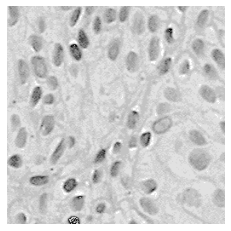

In [67]:
img_cells = io.imread('gif_images/cells.gif')
plt.axis('off')
imgplot = plt.imshow(transform_exp(img_cells, c=2000), cmap='gray')
